<h1> Coupled Entropy for Student-t, Variable DF, $\nu$ </h1>

We can compare the non-standardized Student-t with the Coupled Normal

<h2> Non-standardized</h2>

$\hspace{1in}  student-t   f(x)=\frac{\Gamma(\frac{\nu+1}{2})}
  {\Gamma(\nu/2)\cdot \sqrt{\pi \nu} \hat{\sigma}}
  ( 1 + \frac{1}{\nu}(\frac{x-\hat{\mu}}{\hat{\sigma}})^2)^{-\frac{\nu+1}{2}}$

$\hspace{1in}  Coupled Normal   f(x)\propto 
  ( 1 + \kappa(\frac{|x-\hat{\mu}|^\alpha}{\hat{\sigma}})^2)^{-\frac{1+\kappa}{\alpha \kappa}}$

<h2> Standardized</h2>
Standardize with $\mu=0$ and $\sigma=1$ and take $\alpha=2$

$\hspace{1in}  student-t  f(x)\propto
  ( 1 + \frac{x^2}{\nu}){-\frac{\nu+1}{2}}$

$\hspace{1in}  Coupled Normal  f(x)\propto 
  ( 1 + \kappa x^2)^{-\frac{1+\kappa}{\alpha \kappa}}$

Immediately, then $\kappa = \frac{1}{\nu}$

Claim: We can use ftp.montecarlo.expectation() to compute Coupled Entropy

Method:

$E[g(X)] = \int g(x) f(x) dx$

$E[f(X)^n] = \int f(x)^{n+1} dx$

Analytic Check:

$x\sim exp(\lambda)$

$\int_0^\infty f(x)^{n+1}\, dx = \int_0^\infty f(x)^n f(x)\, df =E[f(X)^n]$

$\int_0^\infty (\lambda e^{-\lambda x})^{n+1}\, dx 
= \int_0^\infty \lambda^{n+1} e^{-\lambda (n+1) x} dx = \frac{\lambda^{n+1}}{-\lambda (n+1)} e^{-\lambda (n+1) x} |_0^\infty
=\frac{\lambda^{n+1}}{\lambda\cdot (n+1)}$

So, check to see that $E[f(X)^n] = \frac{\lambda^{n+1}}{\lambda\cdot (n+1)}$ using TFP.

In [ ]:
n=8
lambda_ = 3
num_draws = 1e6

theory = lambda_**(n+1)/( (n+1)*lambda_)
print('theory: ', theory)


p = tfp.distributions.Exponential(rate=lambda_)

expectation = tfp.monte_carlo.expectation(
    f=lambda x: (p.prob(x))**(n),
    samples=p.sample(num_draws, seed=42),
    log_prob=p.log_prob,
    use_reparameterization=(p.reparameterization_type
                           == tfp.distributions.FULLY_REPARAMETERIZED))

print('expectation: ', expectation)



theory:  729.0
expectation:  tf.Tensor(728.1196, shape=(), dtype=float32)


<h1> Coupled Entropy Calculation</h1>

We compute the coupled entropy of a random variable with density $f(x)$ as

$S_{\alpha, \kappa} = 
\frac{1}{\kappa} ( 1- (\int_{x\in X} f^{1+\frac{\alpha \kappa}{1+\kappa}}(x)\, dx)^{-1})$

To calculate the integral, use the fact that

$\int_{x\in X} f(x)^{1+n}\, dx = E[f(X)^n]$

Expressed in terms of within our calculation:

$\int_{x\in X} f(x)^{1+\frac{\alpha \kappa}{1+\kappa}} dx 
= E[f(X)^{\frac{\alpha \kappa}{1+\kappa}}]$









Text(0.5, 1.0, 'Coupled Entropy for Coupled Normal 0<kappa<1')

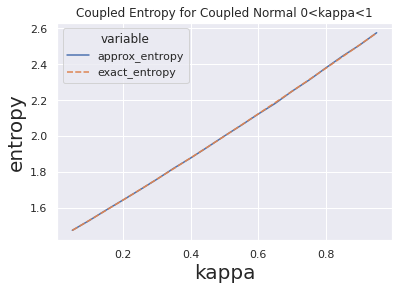

In [1]:
import math
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp

gamma = math.gamma

num_draws = 1e6
alpha = 2
kappa_values = np.arange(start=0.05,stop=1,step=.05).reshape(-1,1)

approx_entropy = np.empty(shape=kappa_values.shape,dtype='float') 
exact_entropy = np.empty(shape=kappa_values.shape,dtype='float') 

for kappa_i, kappa_value in enumerate(kappa_values):

  p = tfp.distributions.StudentT(df=float(1./kappa_value), loc=0., scale=1.)
  
  expectation = tfp.monte_carlo.expectation(
    f=lambda x: (p.prob(x))**(alpha*kappa_value/(1+kappa_value)),
    samples=p.sample(num_draws, seed=42),
    log_prob=p.log_prob,
    use_reparameterization=(p.reparameterization_type
                           == tfp.distributions.FULLY_REPARAMETERIZED))
  
  #print("kappa_i, expectation: ",kappa_i, expectation)
  approx_entropy[kappa_i] = -0.5*(1./kappa_value)*(1-expectation**(-1.))

  dim=1
  determinant=1
  coupled_entropy = (((np.pi/kappa_value)**dim) * determinant)**(kappa_value/(1+dim*kappa_value))
  coupled_entropy *= (1+dim*kappa_value)
  coupled_entropy *= (gamma(1/(2*kappa_value))/
                      gamma(0.5*(dim + 1/kappa_value)))**(2*kappa_value/(1+dim*kappa_value))

  coupled_entropy += -1
  coupled_entropy /= (2*kappa_value)

  exact_entropy[kappa_i] = coupled_entropy
    
data = np.concatenate((kappa_values, approx_entropy, exact_entropy), axis=1)
df = pd.DataFrame(data, columns = ['kappa_value', 'approx_entropy', 'exact_entropy'] )

sns.set_theme()

df_melt = pd.melt(df, id_vars=['kappa_value'], 
                  value_vars=['approx_entropy', 'exact_entropy'])
#print(df_melt)

sns.lineplot(data=df_melt, x="kappa_value", y="value", 
                hue="variable", style="variable")
#print(df_melt.variable)
plt.xlabel("kappa", size=20)
plt.ylabel("entropy", size=20)
plt.title("Coupled Entropy for Coupled Normal 0<kappa<1")
